http://sklearn.apachecn.org/cn/0.19.0/modules/linear_model.html

# 广义线性模型

## 普通最小二乘法

### Linear Regression

In [1]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit([[0,0],[1,1],[2,2]],[0,1,2])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [2]:
reg.coef_    #系数

array([ 0.5,  0.5])

In [3]:
reg.intercept_

2.2204460492503131e-16

### Linear Regression Example

This example uses the only the first feature of the diabetes dataset, in order to illustrate a two-dimensional plot of this regression technique. The straight line can be seen in the plot, showing how linear regression attempts to draw a straight line that will best minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation.

The coefficients, the residual sum of squares and the variance score are also calculated.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error,r2_score

diabetes = datasets.load_diabetes()

[np.newaxis用法](http://blog.csdn.net/lanchunhui/article/details/49725065)

In [17]:
test = np.array([[1,2,3,4,5,6],[2,3,4,5,6,7],[3,4,5,6,7,8]])
test[:,np.newaxis,2]

array([[3],
       [4],
       [5]])

In [18]:
#Use only one feature
diabetes_X = diabetes.data[:,np.newaxis,2]
#Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

Coeffients: 
 [ 938.23786125]
Mean Squared error: 2548.07
Variance score: 0.47


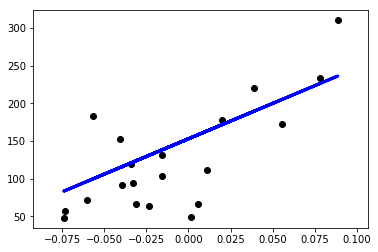

In [19]:
#Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]
#Create linear regression object
regr = linear_model.LinearRegression()
#Train the model using the training sets
regr.fit(diabetes_X_train,diabetes_y_train)
#Make predictions using the testing data
diabetes_y_pred = regr.predict(diabetes_X_test)

#The coeffients(系数)
print('Coeffients: \n',regr.coef_)
#The mean squared error
print("Mean Squared error: %.2f" % mean_squared_error(diabetes_y_test,diabetes_y_pred))
#Explained variance score: 1 is perfect prediction
print("Variance score: %.2f" % r2_score(diabetes_y_test,diabetes_y_pred))

#Plot outputs
plt.scatter(diabetes_X_test,diabetes_y_test,color='black')
plt.plot(diabetes_X_test,diabetes_y_pred,color='blue',linewidth=3)
plt.xticks()
plt.yticks()
plt.show()

### 普通最小二乘法复杂度

该方法使用 X 的奇异值分解来计算最小二乘解。如果 X 是一个 size 为 (n, p) 的矩阵，设 $n\geq p $ ，则该方法花费的成本为 $O(n p^2)$

## 岭回归

Ridge 回归通过对系数的大小施加惩罚来解决 普通最小二乘法 (普通最小二乘)的一些问题。 岭系数最小化一个带罚项的残差平方和，

$\underset{w}{min\,} {{|| X w - y||_2}^2 + \alpha {||w||_2}^2}$

其中， $\alpha \geq 0$是控制收缩量复杂性的参数： $\alpha$的值越大，收缩量越大，因此系数对共线性变得更加鲁棒。

### Linear_model.Ridge

In [20]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
reg.fit([[0,0],[0,0],[1,1]],[0,.1,1])

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [21]:
reg.coef_

array([ 0.34545455,  0.34545455])

In [22]:
reg.intercept_

0.13636363636363641

### 这种方法与 普通最小二乘法 (普通最小二乘方法)的复杂度是相同的.

### 设置正则化参数：广义交叉验证

In [24]:
from sklearn import linear_model
reg = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0])
reg.fit([[0,0],[0,0],[1,1]],[0,.1,1])

RidgeCV(alphas=[0.1, 1.0, 10.0], cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [25]:
reg.alpha_

0.10000000000000001

## Lasso

The Lasso 是估计稀疏系数的线性模型。 它在一些情况下是有用的，因为它倾向于使用具有较少参数值的情况，有效地减少给定解决方案所依赖变量的数量。 因此，Lasso及其变体是压缩感知领域的基础。 在一定条件下，它可以恢复一组非零权重的精确集 (见 [Compressive sensing: tomography reconstruction with L1 prior (Lasso)](http://sklearn.apachecn.org/cn/0.19.0/auto_examples/applications/plot_tomography_l1_reconstruction.html#sphx-glr-auto-examples-applications-plot-tomography-l1-reconstruction-py)).

在数学上，它由一个线性模型组成，以 $\ell_1$ 为准。 其目标函数的最小化是:

$\underset{w}{min\,} { \frac{1}{2n_{samples}} ||X w - y||_2 ^ 2 + \alpha ||w||_1}$

lasso estimate 解决了加上罚项 $\alpha ||w||_1$ 的最小二乘法的最小化，其中， $\alpha$ 是一个常数， $||w||_1$ 是参数向量的 $\ell_1-norm$ 范数。

Lasso 类的实现使用了 coordinate descent （坐标下降算法）来拟合系数。 查看 最小角回归 用于另一个实现:

In [27]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha = 0.1)
reg.fit([[0,0],[1,1]],[0,1])

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [28]:
reg.predict([[1,1]])

array([ 0.8])

### 设置正则化参数

In [ ]:
alpha 参数控制估计系数的稀疏度。

## 多任务Lasso

## 弹性网络

## 多任务弹性网络

## 最小角回归

## LARS Lasso